In [1]:
# This dataset contains amazon customer reviews. This data only has the electronic gadgets manufactured by Amazon.
# the dataset contains reviews for various products.
# Te users give "reviews text" and "reviews rating" in range of 0-5. 
# Based on these ratings we categorize wether a review is positive or negative.
# There are some reviews whic as review text but not the rating score.
# The aim of the project is to find rating(positive or negative) for products where user as only given text review.

In [2]:
# Loading required packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Loading the data as Pandas dataframe
data = pd.read_csv('Amazon_Unlocked_Mobile.csv')
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
# Summary of data
data.describe()
# We can see that the data has very few numerical variables and maximum are character variables 

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819570,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [6]:
# Number of unique observations in each coumn:
data.nunique()
# asins seems to be a unique code associated with each product name but it is not the case. There are more than
# one products associated with same asin. 

Product Name      4410
Brand Name         384
Price             1754
Rating               5
Reviews         162489
Review Votes       241
dtype: int64

In [7]:
data.dtypes

Product Name     object
Brand Name       object
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

In [8]:
data1 = data.dropna()

In [9]:
# The aim of this project is to predict the ratings for "null" reviews or where users have only provided reviews text
# Checking all null reviews where values will be predicted:
new_null = data1[data1["Rating"].isnull()]
print(new_null.isnull().sum()) #Checking for null values


Product Name    0.0
Brand Name      0.0
Price           0.0
Rating          0.0
Reviews         0.0
Review Votes    0.0
dtype: float64


In [10]:
# New data frame with null reviews rating:
new_null

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes


In [11]:
# Checking all not null reviews rating and classifying them into positive and negative:
new_notnull = data1[data1["Rating"].notnull()]
new_notnull.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [12]:
# Classifying into positive and negative reviews:

new_notnull = new_notnull[new_notnull['Rating'] != 3]
new_notnull['Sentiment'] = np.where(new_notnull['Rating'] > 3, 1, 0)
new_notnull
#new_notnull["Rating"] = new_notnull["Rating"]>=3
#new_notnull["Rating"] = new_notnull["Rating"].replace([True , False] , ["Positive" , "Negative"])
#new_notnull["Rating"].value_counts()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,0
...,...,...,...,...,...,...,...
413832,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,good rugged phone that has a long-lasting batt...,0.0,1
413834,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,used hard,0.0,0
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,1
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,1


In [13]:
# Converting te reviews to text data:
new_null['Reviews']=new_null['Reviews'].astype(str)
new_notnull['Reviews']=new_notnull['Reviews'].astype(str)

In [14]:
# Cleaning of data to remove unwanted signs and unecessary words or URL:
def data_clean(cleaning):
    # Converting to lower case:
    cleaning.lower()
    # Removing #/@:
    cleaning = re.sub(r"#(\w+)", ' ', cleaning, flags=re.MULTILINE)
    cleaning = re.sub(r"@(\w+)", ' ', cleaning, flags=re.MULTILINE)
    # Removing URL:
    cleaning = re.sub(r"http\S+|www\S+|https\S+", '', cleaning, flags=re.MULTILINE)
    # Removing stop words:
    cleaning_words = word_tokenize(cleaning)
    nonstop_words = [w for w in cleaning_words if not w in stop]
    
    return " ".join(nonstop_words)

In [15]:
# Call function for data cleaning:
new_null['clean_review'] = new_null['Reviews'].apply(data_clean)
new_notnull['clean_review'] = new_notnull['Reviews'].apply(data_clean)

In [16]:
# Splitting the data into train and test:
split = new_notnull[["clean_review" , "Sentiment"]]
train=split.sample(frac=0.2,random_state=7)
test=split.drop(train.index)

In [17]:
train

,clean_review,Sentiment
340377,After making mistake trying Windows two year c...,1
362191,Nice product ! !,1
28392,"So far , good . Phone arrived liked new , unlo...",1
88535,It 's new phone . It connecetd somebody 's AT ...,0
224516,So far good . I received last week . Great pic...,1
...,...,...
317034,It 's nice still waiting marshmallow update wo...,1
165397,Husband loves blackberry . I washed accident A...,1
237670,It 's Android unlocked phone . It LED Flashlig...,1
410272,Fast shipping . I satisfied product . No scrat...,1


In [18]:
# There are many words occuring very frequently and it is important to understand the weight of these words. 
# Using tf idf transformer will help doing that:
# First, a vocabulary is built to store thhe words by using count_vectorize

count_vect = CountVectorizer(min_df=3 ,stop_words=stop)
tfidf_transformer = TfidfTransformer()

X_train = count_vect.fit_transform(train["clean_review"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
y_train = train["Sentiment"]

X_test = count_vect.transform(test["clean_review"])
X_test_tfidf = tfidf_transformer.transform(X_test)
y_test = test["Sentiment"]


In [19]:
# Logistic Regression model:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
y_predict_lr

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, ..., 1, 1, 1])

## Classification Metrics for SKLearn Logsitic Regression

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_predict_lr))
print('\n')
print(classification_report(y_test,y_predict_lr))
#print(accuracy_score(y_test, y_predict_lr))
#print(classification_report(y_test,y_predict_lr))

[[ 51254  10826]
 [  5926 178614]]


              precision    recall  f1-score   support

           0       0.90      0.83      0.86     62080
           1       0.94      0.97      0.96    184540

    accuracy                           0.93    246620
   macro avg       0.92      0.90      0.91    246620
weighted avg       0.93      0.93      0.93    246620



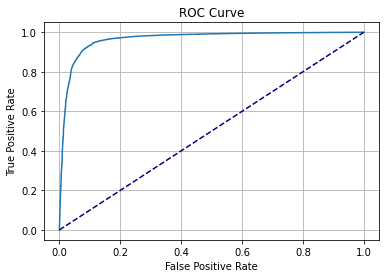

In [21]:
from sklearn.metrics import roc_curve
probLR=LR_model.predict_proba(X_test)[:,1]
probLR
fpr_lr, tpr_lr, thresholds = roc_curve(y_test,probLR)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot(fpr_lr,tpr_lr)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.grid(True)